<a href="https://colab.research.google.com/github/Dhruv2642/Email-Spam-Classifier-Using-Naive-Bayes/blob/main/Email_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')

df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})

print(df['label_num'].value_counts())


label_num
0    4825
1     747
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42)


In [ ]:
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_cv, y_train)

y_pred = model.predict(X_test_cv)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



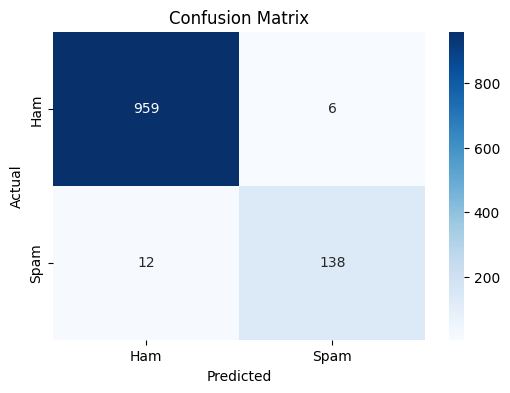

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def predict_email(text):
    text_vec = cv.transform([text])
    pred = model.predict(text_vec)
    return "Spam" if pred[0] == 1 else "Ham"

print(predict_email("Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!"))
print(predict_email("Hi John, please send me the project file."))


Spam
Ham


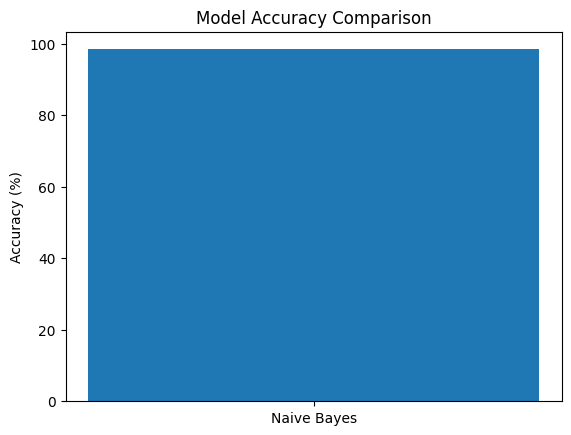

In [ ]:
accuracies = [accuracy_score(y_test, y_pred)*100]
models = ['Naive Bayes']

plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.show()
